# Relipa grid generation

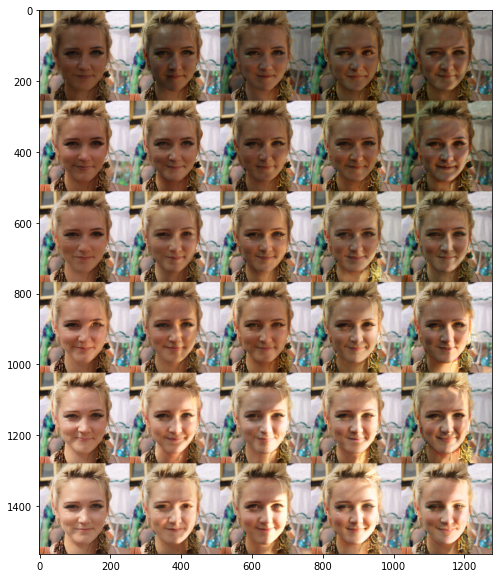

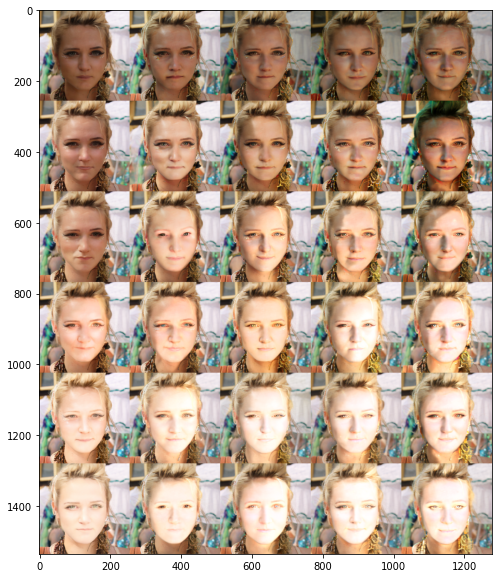

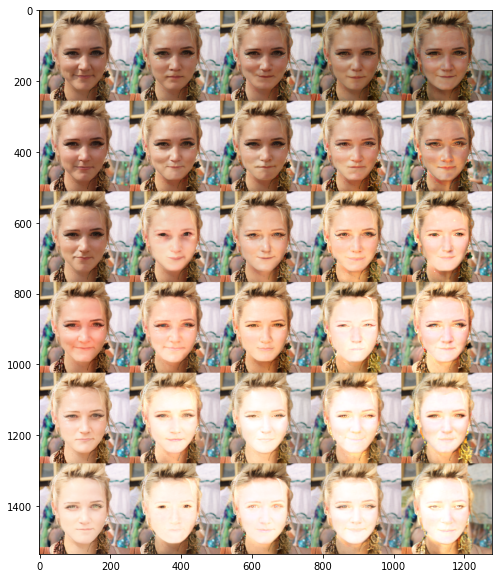

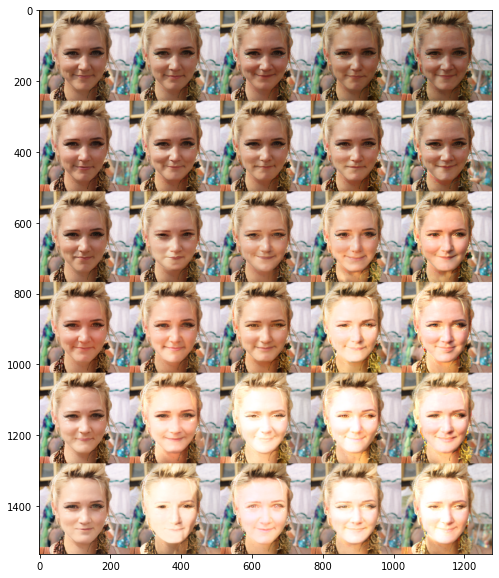

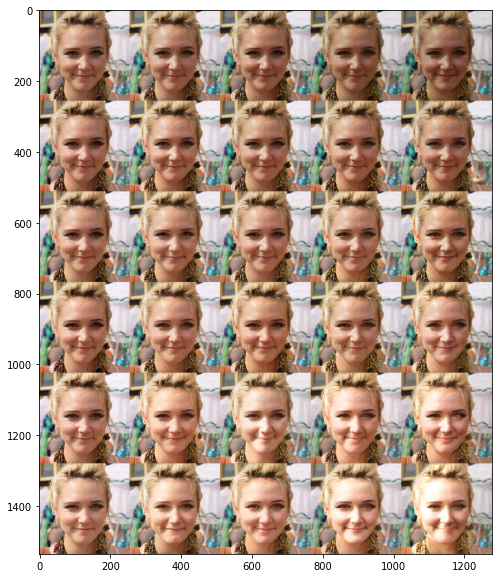

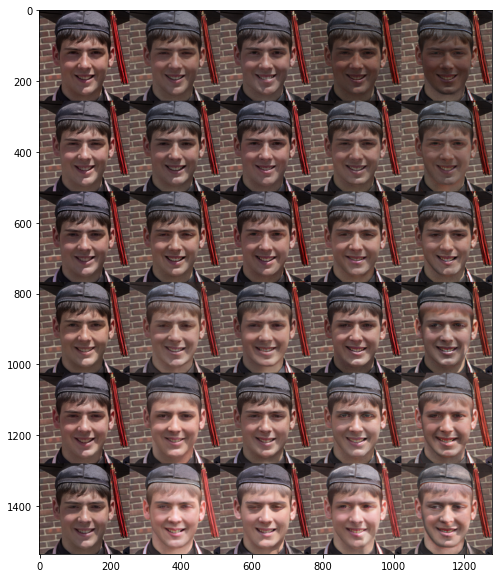

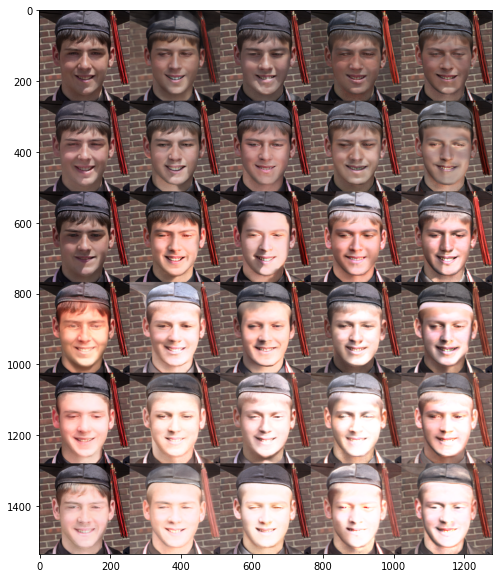

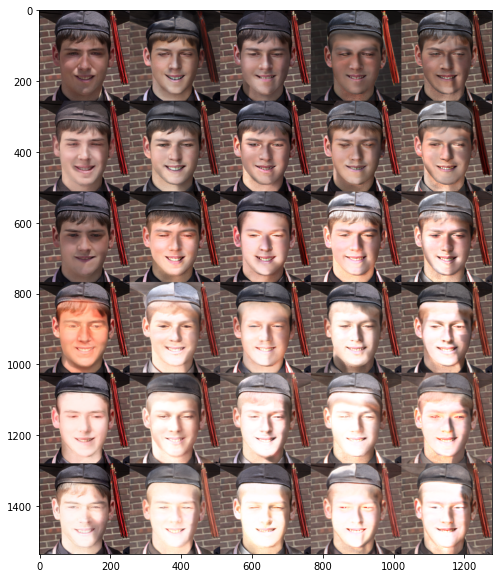

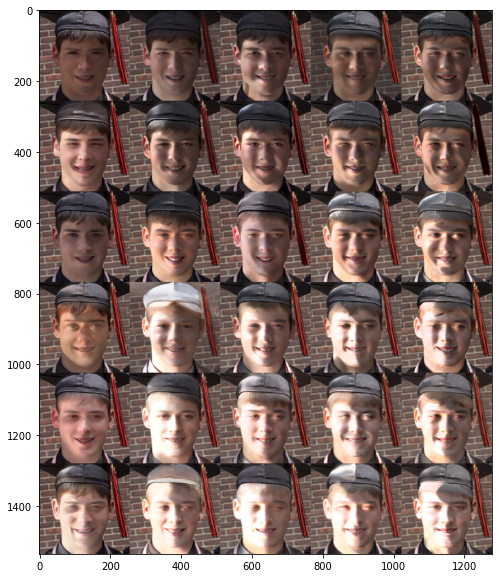

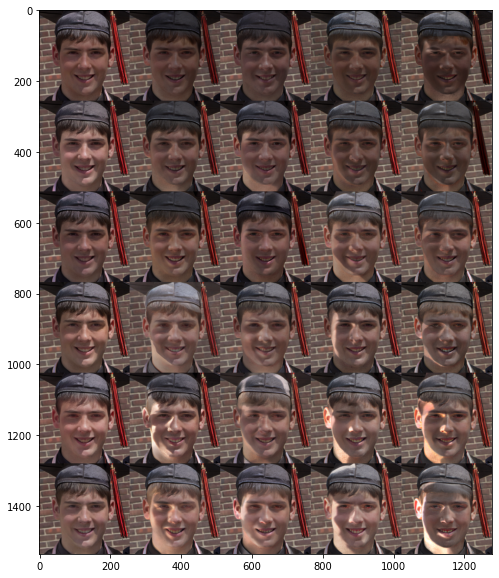

In [ ]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
from PIL import Image
import json

mani_light = 'rotate_sh_axis=1'
sample_pair_json = '/home/mint/Dev/DiFaReli++/difareli_pp/experiment_scripts/TPAMI/sample_json/TPAMI_MajorRevision/rotateSH.json'
num_frames = 60
with open(sample_pair_json, 'r') as f:
    sample_pairs = json.load(f)['pair']
    sample_pairs_k = [k for k in sample_pairs.keys()]
    sample_pairs_v = [v for v in sample_pairs.values()]


def gen(fid, src, dst):
    rows = []
    for scale_sh in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        cols = []
        for gs in [2.0, 4.0, 4.5, 6.0, 8.0]:
            sampling_path = f'/data/mint/TPAMI_MajorRevision/New_Baselines_Tuning/Relipa/ffhq_tuning/{mani_light}/src={src}_dst={dst}/scale_sh={scale_sh}/gs={gs}_ds=25/n_step={num_frames}/'
            imgs = sorted(glob.glob(f'{sampling_path}/res_frame*.png'))
            if len(imgs) == 0:
                frame = None
            else:
                frame = imgs[fid]
            cols.append(frame)
        rows.append(cols)
    return rows

for idx in [0, 1]:
    pair = sample_pairs_v[idx]
    pair_id = sample_pairs_k[idx]
    src = pair['src']
    dst = pair['dst']
    os.makedirs(f'./grid_{src}/', exist_ok=True)
    
    frame_id = [10, 25, 35, 45, 55]
    for fi in frame_id:
        fn_grid = gen(fi, src, dst)
        
        # Load image
        out_grid = []
        for i in range(len(fn_grid)):
            col = []
            for j in range(len(fn_grid[i])):
                if fn_grid[i][j] is not None:
                    img = Image.open(fn_grid[i][j])
                    img = img.resize((256, 256), Image.LANCZOS)
                else:
                    img = Image.new('RGB', (256, 256), color='black')
                col.append(np.array(img))
            out_grid.append(np.concatenate(col, axis=1))
        out_grid = np.concatenate(out_grid, axis=0)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(out_grid)
        plt.show()
        plt.close()
        
        Image.fromarray(out_grid).save(f'./{mani_light}_grid_{src}/fid={fi}.png')
        
        
                    
        

